# ELS(Equity Linked Securities)

## Monte Carlo simulation

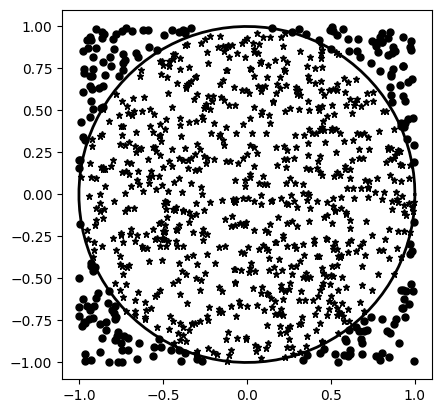

Pi=3.108000


In [16]:
# 한 변이 2인 정사각형에 다트를 단졌을때, 반지름이 1인 원 안에 들어올 확률
# 원주율 = 4*(원 안에 들어온 다트 개수 / 총 다트 개수)
# 1000번 던짐

import numpy as np
import matplotlib.pyplot as plt

N = 1000
count=0
x=np.zeros([N,1])
y=np.zeros([N,1])
z=np.zeros([N,1])
r=np.zeros([N,1])

x=2*np.random.random((N,1))-1 #-1~1의 범위를 갖도록 난수 조절
y=2*np.random.random((N,1))-1
z=np.power(x,2) + np.power(y,2)
r=np.sqrt(z)

for i in range(N):
    if r[i]<1:
        count=count+1
        plt.plot(x[i],y[i],'k*', markersize=5)
    else:
        plt.plot(x[i],y[i],'ko' , markersize=5)

t = np.linspace(0, 2*np.pi,100) #0~2파이 원의 각도를 100개의 값으로 이루어진 배열 t로 표현
plt.plot(np.cos(t),np.sin(t),'k', linewidth=2)
plt.axis('image') #정사각형으로 그려지도록 설정
plt.show()

# 원 그리기
Pi=4*count/N # 우리가 구하고자 하는 확률 = count/N = pi/4 
print('Pi=%f'%Pi) #원주율의 근사값 출력

## 1. Stock Process

In [ ]:
# 주가 지수의 확률 과정은 Geometric Brownian motion을 따름
# 해당 식에 자연로그를 취한 후 이토의 보조정리를 적용하여 주가 경로식 도출

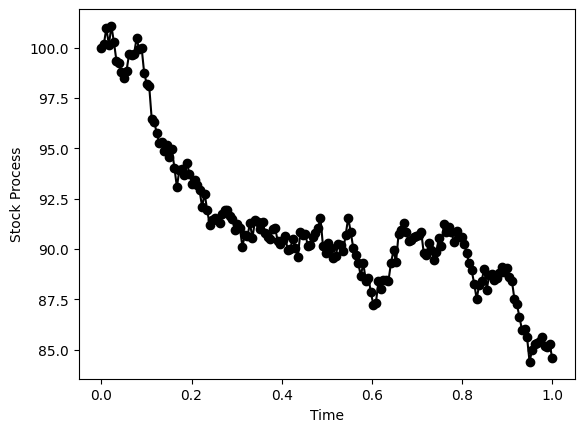

In [2]:
# 무위험 이자율 1.65%, 변동성 7.9%, 현재 시점의 주가 100
import numpy as np
import matplotlib.pyplot as plt

N=180
S=np.zeros([N,1]) #N개의 원소 1차원 배열 생성. 모든 원소 0으로 초기화
S[0]=100 # 첫 번째 원소 100

vol=0.079
r=0.0165
T=1 # Time to maturity
dt=T/N # 각 단계에서 시간 간격

t=np.linspace(0,T,N) # 0부터 T까지 N개의 시간 값으로 이루어진 배열
z= np.random.normal(0,1,N) # 평균이 0이고 표준편차가 1인 N개의 난수 배열

for i in range(N-1):
    S[i+1,0]=S[i,0]*np.exp((r-0.5*vol**2)*dt+vol*z[i]*np.sqrt(dt))

plt.plot(t,S[:,0], 'ko-')
plt.xlabel('Time')
plt.ylabel('Stock Process')
plt.show()

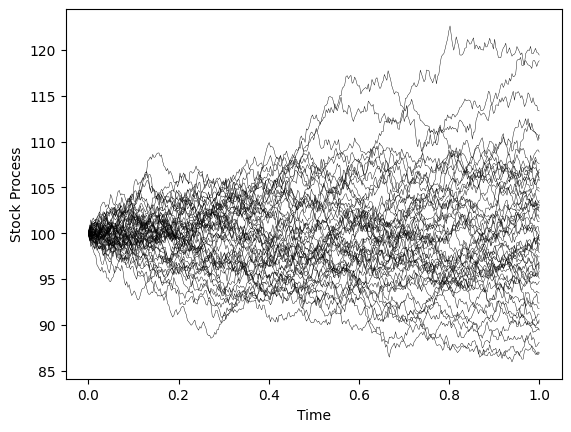

In [4]:
# 50개의 주가 경로로 확장

import numpy as np
import matplotlib.pyplot as plt

N=365
S=np.zeros([N,1]) 
S[0]=100 

vol=0.079
r=0.0165
T=1 
dt=T/N 

t=np.linspace(0,T,N) 
plt.xlabel('Time')
plt.ylabel('Stock Process')

for k in range(0,50):
    z= np.random.normal(0,1,N) 
    for i in range(N-1):
        S[i+1,0]=S[i,0]*np.exp((r-0.5*vol**2)*dt+vol*z[i]*np.sqrt(dt))
        
    plt.plot(t[:],S[:],'k-', linewidth=0.3)

plt.show()

## ELS(Equity-Linked Securites) Asset Pricing Using Monte Carlo simulation

### 기초자산이 1개인 ELS

In [1]:
# 주가연계증권(ELS) 가격 구하기 > 현실과 달리 이자율과 주가수익률의 변동성이 일정하다고 가정
# 미래에셋대우(ELS)22903(조기상환형)
import numpy as np
from datetime import date

In [13]:
import numpy as np
from datetime import date

#시뮬레이션 횟수
n=10000
# 이자율
r = 0.0165
# 변동성
vol = 0.1778
# 최초 기준 가격평가일
n0 = date.toordinal(date(2018,3,23))
# 1차 조기 상환일
n1 = date.toordinal(date(2018,9,19))
# 2차 조기 상환일
n2 = date.toordinal(date(2019,3,20))
# 3차 조기 상환일
n3=date.toordinal(date(2019,9,19))
# 4차 조기 상환일
n4=date.toordinal(date(2020,3,19))
# 5차 조기 상환일
n5=date.toordinal(date(2020,9,21))
# 만기 상환일
n6=date.toordinal(date(2021,3,19))
# 조기 상환일 벡터
check_day= np.array([n1-n0, n2-n0, n3-n0, n4-n0, n5-n0, n6-n0])


oneyear = 365  # 1년의 일수
tot_date = n6 - n0  # 만기 상환일
dt = 1 / oneyear  # 시간 격자 간격
S = np.zeros([tot_date + 1, 1])  # 주가 벡터 생성
S[0] = 100.0  # 기초 자산의 초깃값
strike_price = np.array([0.95, 0.95, 0.95, 0.90, 0.90, 0.85]) * S[0]  # 조기행사가격 벡터

repay_n = len(strike_price)  # 조기상환 횟수
coupon_rate = np.array([0.022, 0.044, 0.066, 0.088, 0.11, 0.132])  # 조기행사시 받게 되는 이자율 벡터
payment = np.zeros([repay_n,1])  # 조기상환시 페이오프 벡터
facevalue = 10 ** 4  # 액면 금액
tot_payoff = np.zeros([repay_n, 1])  # 전체 페이오프 벡터
payoff = np.zeros([repay_n, 1])  # 페이오프 벡터
discount_payoff = np.zeros([repay_n, 1])  # 현가 할인 된 페이오프 벡터

kib = 0.65 * S[0]  # 낙인 배리어
dummy = 0.132  # 더미 이자율

# 조기생환 했을 떄의 페이오프 벡터
for j in range(repay_n):
    payment[j]=facevalue*(1+coupon_rate[j])
# 몬테카를로 시뮬레이션을 통한 ELS 가격 결정
for i in range(n):
    # 만기상환일 만큼의 난수 생성
    z = np.random.normal(0, 1, size=[tot_date, 1])
    # 임의의 주가 경로 생성
    for j in range(tot_date):
        S[j + 1] = S[j] * np.exp((r - 0.5 * vol ** 2) * dt + vol * z[j] * np.sqrt(dt))

    # 조기상환일 체크하여 페이오프 결정
    S_checkday = S[check_day]
    payoff = np.zeros([repay_n, 1])

    # 조기상환되지 않은 상태. for문 빠져나감.
    repay_event = 0
    for j in range(repay_n):
        if S_checkday[j] >= strike_price[j]:
            payoff[j] = payment[j]
            # 조기상환이 된 상태
            repay_event = 1
            break

    # 조기상환이 되지 않고 만기까지 온 경우
    if repay_event == 0:
        # 낙인배리어 아래로 내려간적 없는경우
        if min(S) > kib:
            payoff[-1] = facevalue * (1 + dummy)
        # 낙인 배리어 아래로 내려간 적이 있는 경우
        else:
            payoff[-1] = facevalue * (S[-1] / S[0])
    # 시뮬레이션마다 페이오프를 더함
    tot_payoff = tot_payoff + payoff

# 모든 시뮬레이션의 페이오프의 평균을 구함
mean_payoff = tot_payoff / n
# 페이오프를 무위험 이자율로 할인
for j in range(repay_n):
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * check_day[j] / oneyear)

# ELS 가격
price = np.sum(discount_payoff)
print(price)


9887.609724041844


### 기초자산이 2개인 ELS

In [ ]:
# 미래에셋대우(ELS)26043(조기상환형)

<function matplotlib.pyplot.show(close=None, block=None)>

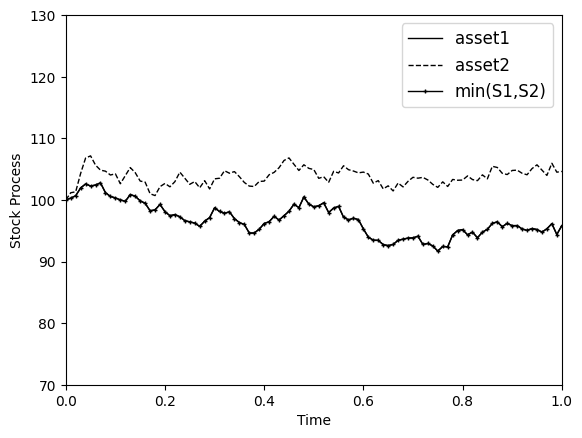

In [1]:
# Cholesky decomposition을 사용해 2개의 기초자산이 상관계수를 갖는 주가경로 생성
import numpy as np
import matplotlib.pyplot as plt
plt.close()

x_vol = 0.079; y_vol=0.105
r=0.021

N=100; T=1
S1=np.zeros((N+1,1))
S2=np.zeros((N+1,1))

S1[0]=100; S2[0]=100
dt=T/N; t=np.linspace(0,T,N+1)
rho=0.3

correlation=np.array([[1,rho],[rho,1]])
cholesky=np.linalg.cholesky(correlation)
z0=np.random.normal(0,1,size=[N,2])
np.random.seed(56)
z0=np.transpose(z0)
z=np.matmul(cholesky,z0)

Worst_performer=np.zeros((N+1,1))

for i in range(N):
    S1[i + 1] = S1[i] *np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol * z[0,i] * np.sqrt(dt))
    S2[i + 1] = S2[i] *np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol * z[1,i] * np.sqrt(dt))
    Worst_performer[i]=min(S1[i,0],S2[i,0])
    Worst_performer[-1]=min(S1[-1,0],S2[-1,0])

plt.plot(t,S1[:],'k-',label='asset1',linewidth=1, markersize=3.5)
plt.plot(t,S2[:],'k--',label='asset2',linewidth=1, markersize=3.5)
plt.plot(t,Worst_performer[:], 'k+-', label='min(S1,S2)', linewidth=1, markersize=3.5)

plt.legend()
plt.xlim(0,1.0)
plt.ylim(70,130)
plt.xlabel('Time')
plt.ylabel('Stock Process')
plt.legend(prop={'size':12})
plt.show

In [5]:
# 기초자산이 2개인 주가연계증권 가격
# [만기평가가격/최초기준가격]의 비율이 더 낮은 가격을 갖는 기초자산을 이용하여 ELS 가격 계산

import numpy as np
from datetime import date

#시뮬레이션 횟수, 이자율, 변동성
n=10000; r = 0.0165
x_vol = 0.249; y_vol=0.2182

n0 = date.toordinal(date(2018,6,29))
n1 = date.toordinal(date(2018,12,21))
n2 = date.toordinal(date(2019,6,25))
n3=date.toordinal(date(2019,12,23))
n4=date.toordinal(date(2020,6,24))
n5=date.toordinal(date(2020,12,23))
n6=date.toordinal(date(2021,6,24))
check_day= np.array([n1-n0, n2-n0, n3-n0, n4-n0, n5-n0, n6-n0]) #조기상환일 벡터

rho=0.0981; corr=np.array([[1,rho],[rho,1]]) #두 기초자산의 상관계수와 촐레스키분해를 위한 상관계수 행렬
coupon_rate = np.array([0.025, 0.05, 0.075, 0.10, 0.125, 0.15])  # 조기행사시 받게 되는 이자율 벡터
oneyear=365; tot_date=n6-n0; dt=1/oneyear

k=np.linalg.cholesky(corr) #촐레스키 분해

#기초자산의 초기값
S1=np.zeros((tot_date+1,1))
S2=np.zeros((tot_date+1,1))
S1[0]=100; S2[0]=100

ratio_S1=S1[0]; ratio_S2=S2[0] #[만기평가가격/최초기준가격]의 비율 결정하기 위해 기초자산의 초기값 저장
strike_price=([0.90,0.90,0.85,0.85,0.80,0.75]) #조기행사가격 벡터

repay_n = len(strike_price)  # 조기상환 횟수
payment = np.zeros([repay_n,1])  # 조기상환시 페이오프 벡터
payoff = np.zeros([repay_n, 1])  # 페이오프 벡터
tot_payoff = np.zeros([repay_n, 1])  # 전체 페이오프 벡터
discount_payoff = np.zeros([repay_n, 1])  # 현가 할인 된 페이오프 벡터
facevalue = 10 ** 4; dummy = 0.15; kib=0.50


# 조기생환 했을 떄의 페이오프 벡터
for j in range(repay_n):
    payment[j]=facevalue*(1+coupon_rate[j])
# 몬테카를로 시뮬레이션을 통한 ELS 가격 결정
for i in range(n):
    w0=np.random.normal(0,1,size=[tot_date,2])
    w0=np.transpose(w0)
    w=np.matmul(k,w0)
    # 임의의 주가 경로 생성
    for j in range(tot_date):
        S1[j + 1] = S1[j] * np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol * np.sqrt(dt)*w[0,j])
        S2[j + 1] = S2[j] * np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol * np.sqrt(dt)*w[1,j])

    R1=S1/ratio_S1; R2=S2/ratio_S2
    WP=np.minimum(R1,R2)
    WP_checkday = WP[check_day]
    payoff = np.zeros([repay_n, 1])
    repay_event = 0

    for j in range(repay_n):
        if WP_checkday[j] >= strike_price[j]:
            payoff[j] = payment[j]
            # 조기상환이 된 상태
            repay_event = 1
            break

    # 조기상환이 되지 않고 만기까지 온 경우
    if repay_event == 0:
        # 낙인배리어 아래로 내려간적 없는경우
        if min(WP) > kib:
            payoff[-1] = facevalue * (1 + dummy)
        # 낙인 배리어 아래로 내려간 적이 있는 경우
        else:
            payoff[-1] = facevalue * WP[-1]
    # 시뮬레이션마다 페이오프를 더함
    tot_payoff = tot_payoff + payoff

# 모든 시뮬레이션의 페이오프의 평균을 구함
mean_payoff = tot_payoff / n
# 페이오프를 무위험 이자율로 할인
for j in range(repay_n):
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * check_day[j] / oneyear)

# ELS 가격
price = np.sum(discount_payoff)
print(price)

9898.007290796611


### 기초자산이 3개인 ELS

In [ ]:
# 미래에셋대우(ELS)22345(조기상환형)

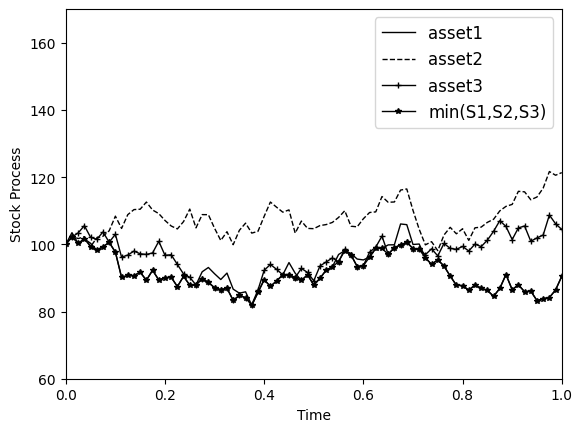

In [4]:
# Cholesky decomposition을 사용해 3개의 기초자산이 상관계수를 갖는 주가경로 생성
import numpy as np
import matplotlib.pyplot as plt

x_vol = 0.2662; y_vol = 0.2105; z_vol = 0.2111; r=0.0165
N=80; T=1; dt=T/N

S1=np.zeros((N+1,1))
S2=np.zeros((N+1,1))
S3=np.zeros((N+1,1))

S1[0] = 100; S2[0] = 100; S3[0] = 100
t=np.linspace(0,T,N+1)
rho_xy = 0.279; rho_xz = 0.2895; rho_yz=0.5256

correlation=np.array([[1,rho_xy,rho_xz],[rho_xy,1,rho_yz],[rho_xz,rho_yz,1]])
cholesky=np.linalg.cholesky(correlation)
z0=np.random.normal(0,1,size=[N,3])
np.random.seed(42)
z0=np.transpose(z0)
z=np.matmul(cholesky,z0)
Worst_performer=np.zeros((N+1,1))

plt.xlim(0,1)
plt.ylim(60,170)

for i in range(N):
    S1[i+1] = S1[i]*np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol*z[0,i]*np.sqrt(dt))
    S2[i+1] = S2[i]*np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol*z[1,i]*np.sqrt(dt))
    S3[i+1] = S3[i]*np.exp((r - 0.5 * z_vol ** 2) * dt + z_vol*z[2,i]*np.sqrt(dt))

    Worst_performer[i] = min(S1[i,0], S2[i,0], S3[i,0])
    Worst_performer[-1] = min(S1[-1,0], S2[-1,0], S3[-1,0])

plt.plot(t,S1[:],'k',label='asset1', linewidth=1,markersize=4)
plt.plot(t,S2[:],'k--',label='asset2', linewidth=1,markersize=4)
plt.plot(t,S3[:],'k+-',label='asset3', linewidth=1,markersize=4)

plt.plot(t,Worst_performer[:],'k*-', label='min(S1,S2,S3)',linewidth=1, markersize=4)

plt.xlabel('Time')
plt.ylabel('Stock Process')
plt.legend(prop={'size':12})
plt.show()

In [7]:
# 기초자산이 3개인 주가연계증권 가격
import numpy as np
from datetime import date

#시뮬레이션 횟수, 이자율, 변동성
n=10000; r = 0.0165
x_vol = 0.2662; y_vol=0.2105; z_vol=0.2111

n0 = date.toordinal(date(2017,12,14))
n1 = date.toordinal(date(2018,6,8))
n2 = date.toordinal(date(2018,12,11))
n3=date.toordinal(date(2019,6,11))
n4=date.toordinal(date(2019,12,10))
n5=date.toordinal(date(2020,6,9))
n6=date.toordinal(date(2020,12,9))
check_day= np.array([n1-n0, n2-n0, n3-n0, n4-n0, n5-n0, n6-n0]) #조기상환일 벡터

rho_xy=0.279; rho_xz=0.2895; rho_yz=0.5256
corr=[[1,rho_xy,rho_xz],
      [rho_xy,1,rho_yz],
      [rho_xz, rho_yz,1]]

k=np.linalg.cholesky(corr) #촐레스키 분해
oneyear=365; tot_date=n6-n0; dt=1/oneyear

#기초자산의 초기값
S1=np.zeros([tot_date+1,1])
S2=np.zeros([tot_date+1,1])
S3=np.zeros([tot_date+1,1])
S1[0]=100.0; S2[0]=100.0; S3[0]=100.0; 

ratio_S1=S1[0]; ratio_S2=S2[0]; ratio_S3=S3[0] #[만기평가가격/최초기준가격]의 비율 결정하기 위해 기초자산의 초기값 저장
strike_price=[0.95,0.95,0.90,0.90,0.85,0.85] #조기행사가격 벡터

repay_n = len(strike_price)  # 조기상환 횟수
coupon_rate = [0.048,0.096,0.144,0.192,0.124,0.288]

tot_payoff = np.zeros([repay_n, 1])  # 전체 페이오프 벡터
payoff = np.zeros([repay_n, 1])  # 페이오프 벡터
discount_payoff = np.zeros([repay_n, 1])  # 현가 할인 된 페이오프 벡터
payment = np.zeros([repay_n,1])  # 조기상환시 페이오프 벡터
facevalue = 10 ** 4; dummy = 0.06; kib=0.50

# 조기생환 했을 떄의 페이오프 벡터
for j in range(repay_n):
    payment[j]=facevalue*(1+coupon_rate[j])
# 몬테카를로 시뮬레이션을 통한 ELS 가격 결정
for i in range(n):
    w0=np.random.normal(0,1,size=[tot_date,3])
    w0=np.transpose(w0)
    w=np.matmul(k,w0)
    payoff = np.zeros([repay_n, 1]); repay_event = 0
    # 임의의 주가 경로 생성
    for j in range(tot_date):
        S1[j + 1] = S1[j] * np.exp((r - 0.5 * x_vol ** 2) * dt + x_vol * np.sqrt(dt)*w[0,j])
        S2[j + 1] = S2[j] * np.exp((r - 0.5 * y_vol ** 2) * dt + y_vol * np.sqrt(dt)*w[1,j])
        S3[j + 1] = S3[j] * np.exp((r - 0.5 * z_vol ** 2) * dt + z_vol * np.sqrt(dt)*w[2,j])

    R1=S1/ratio_S1; R2=S2/ratio_S2; R3=S3/ratio_S3
    WP=np.minimum(R1,R2,R3)
    WP_checkday = WP[check_day]

    for j in range(repay_n):
        if WP_checkday[j] >= strike_price[j]:
            payoff[j] = payment[j]
            # 조기상환이 된 상태
            repay_event = 1
            break

    # 조기상환이 되지 않고 만기까지 온 경우
    if repay_event == 0:
        # 낙인배리어 아래로 내려간적 없는경우
        if min(WP) > kib:
            payoff[-1] = facevalue * (1 + dummy)
        # 낙인 배리어 아래로 내려간 적이 있는 경우
        else:
            payoff[-1] = facevalue * WP[-1]
    # 시뮬레이션마다 페이오프를 더함
    tot_payoff = tot_payoff + payoff

# 모든 시뮬레이션의 페이오프의 평균을 구함
mean_payoff = tot_payoff / n
# 페이오프를 무위험 이자율로 할인
for j in range(repay_n):
    discount_payoff[j] = mean_payoff[j] * np.exp(-r * check_day[j] / oneyear)

# ELS 가격
price = np.sum(discount_payoff)
print(price)

9726.83085579684
